In [26]:
import os
import pandas as pd

import matplotlib.pyplot as plt
import cv2

from sklearn.model_selection import train_test_split

In [16]:
listOfFiles = os.listdir('input/dataset1024/mask')
names, existLabels = [], []
for i in range(len(listOfFiles)):
    name = 'input/dataset1024/mask/'+listOfFiles[i]
    names.append(name)
    img = cv2.imread(name)
    if img.sum()==0:
        existLabels.append(0)
    else:
        existLabels.append(1)

In [17]:

df = pd.DataFrame({'name':names, 'existLabel':existLabels})
df.head()

,name,existLabel
0,input/dataset1024/mask/1.2.276.0.7230010.3.1.4...,0
1,input/dataset1024/mask/1.2.276.0.7230010.3.1.4...,0
2,input/dataset1024/mask/1.2.276.0.7230010.3.1.4...,0
3,input/dataset1024/mask/1.2.276.0.7230010.3.1.4...,0
4,input/dataset1024/mask/1.2.276.0.7230010.3.1.4...,0


In [19]:
df['name'] = df['name'].apply(lambda x: x[3:])
df.head()

,name,existLabel
0,1.2.276.0.7230010.3.1.4.8323329.2266.151787517...,0
1,1.2.276.0.7230010.3.1.4.8323329.10991.15178752...,0
2,1.2.276.0.7230010.3.1.4.8323329.11390.15178752...,0
3,1.2.276.0.7230010.3.1.4.8323329.11587.15178752...,0
4,1.2.276.0.7230010.3.1.4.8323329.5714.151787518...,0


In [21]:
train, val = train_test_split(df, test_size=0.2, random_state=42)

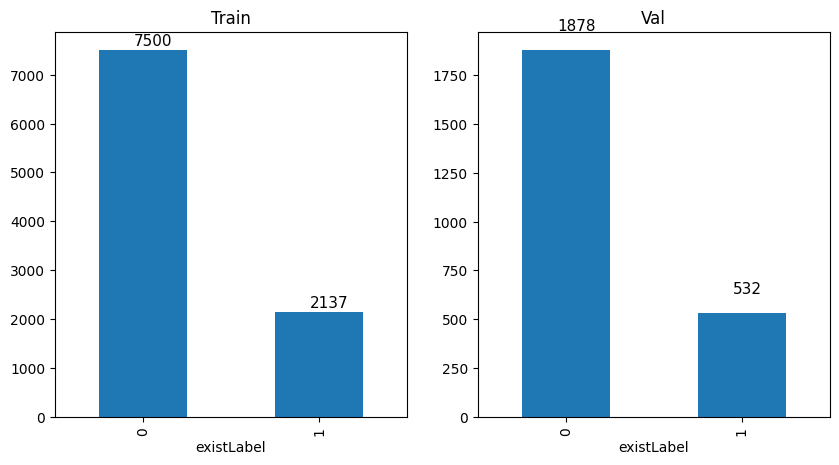

In [25]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].set_title('Train')
ax[1].set_title('Val')
train['existLabel'].value_counts().plot(kind='bar', ax=ax[0])
for i in ax[0].patches:
    ax[0].text(i.get_x()+0.2, i.get_height()+100, str(i.get_height()), fontsize=11, color='black')
val['existLabel'].value_counts().plot(kind='bar', ax=ax[1])
for i in ax[1].patches:
    ax[1].text(i.get_x()+0.2, i.get_height()+100, str(i.get_height()), fontsize=11, color='black')
plt.show()

In [27]:
# write to csv
train.to_csv('input/train.csv', index=False)
val.to_csv('input/val.csv', index=False)